In [1]:
import numpy as np
from scipy import stats

Задача 1
Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
Является ли значимым получившееся уравнение регрессии?

In [2]:
X = np.array([[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])
y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [3]:
ones = np.ones((X.shape[0], 1))

In [4]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [5]:
alpha = 0.05

k1 = 2
k2 = X.shape[0] - 2 - 1

k1, k2
t = stats.f.ppf(1 - alpha, k1, k2)
t
print(f'Критическая область [{t}; ∞)')


Критическая область [4.73741412777588; ∞)


In [6]:
for i in range(4):
    for j in range(i + 1,4):
        print(f'i = {i} j = {j}')
        x1 = X.T[i].reshape(-1, 1)
        x2 = X.T[j].reshape(-1, 1)
        x = np.hstack((ones,x1, x2))
        
        XTX = x.T.dot(x)
        det = np.linalg.det(XTX)
        if det < 0.1:
            print("Детерминант матрицы слишком мал")
            continue
        else:
            XTX_inv = np.linalg.inv(XTX)
            b = XTX_inv.dot(x.T).dot(y)
            print(b)
            z = x.dot(b)
            e = y - z
            R = 1 - sum_of_squares(e) / sum_of_squares(y)
            print(f'Коэффициент детерминации равен {R}')
            F = (R / k1) / ((1 - R) / k2)
            print(f'Значение статистики равно {F}')



i = 0 j = 1
[6.70781579 0.40786841 1.03360247]
Коэффициент детерминации равен 0.18113594742585215
Значение статистики равно 0.7742137586789185
i = 0 j = 2
[3.62455695 1.62531203 1.21134979]
Коэффициент детерминации равен 0.7634246238793151
Значение статистики равно 11.294439122922642
i = 0 j = 3
[5.70686123 0.68359949 1.12650707]
Коэффициент детерминации равен 0.4532966783144077
Значение статистики равно 2.9020097577033583
i = 1 j = 2
[2.48896193 1.60611956 0.86269915]
Коэффициент детерминации равен 0.5479482734039012
Значение статистики равно 4.242476787677875
i = 1 j = 3
[1.91685221 1.74373667 1.31971882]
Коэффициент детерминации равен 0.6062055761129934
Значение статистики равно 5.387886134731741
i = 2 j = 3
[3.64001086 0.70753914 1.04851745]
Коэффициент детерминации равен 0.622441987650532
Значение статистики равно 5.770098595498478


Таким образом, максимальный уровень линейной зависимости достигается для первого и третьего признака. 
Коэффициент детерминации равен 0.7634246238793151
Значение статистики равно 11.294439122922642, что попадает в критическую область, следовательно, уравнение регресии 
y = 3.62455695 + 1.62531203* x0 + 1.21134979 * x2
можно признать значимым


Задача 2

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах A и B?

Обозначим факт покупки 1, а посещение без покупки 0. Тогда для первой страницы будет массив из 2509 чисел, из которых 77 единиц, а остальный нули. Аналогично для второй страницы.

In [7]:
y1_mean = 77/2509
y2_mean = 60/1465
y1_mean, y2_mean

(0.03068951773614986, 0.040955631399317405)

In [8]:
y_mean = (77+60)/(2509 + 1465)
y_mean

0.03447408152994464

In [9]:
SS_b = 2509 * (y1_mean - y_mean) ** 2 + 1465 * (y2_mean - y_mean) ** 2 
SS_b

0.09748158004016791

In [10]:
SS_w = 77*(1 - y1_mean) ** 2 + (2509 - 77)*(0 - y1_mean)**2 + 60 *(1 - y2_mean) ** 2 + (1465 - 60)*(0 - y2_mean)**2
SS_w

132.17956925035742

In [11]:
k = 2
n = 2509 + 1465

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.033277837172798946)

In [12]:
F = sigma2_b / sigma2_w
F

2.92932438890135

In [13]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Значение статистики не попало в критическую область, поэтому считаем, что отличие не является статистически значимым

Задача 3

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
По каждой паре выборок посчитайте:

выборочное среднее и дисперсию каждой выборки,
коэффициент корреляции Пирсона и прямую линейной регрессии.
Убедившись в том, что они не практически не отличаются, постройте scatter plot по каждой паре выборок.

In [14]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [15]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [16]:
def check(x, y: np.ndarray):
        print(f'Среднее x = {x.mean(),}, среднее x = {y.mean()}')
        print(f'Дисперсия x = {x.var(ddof = 1)}, дисперсия x = {y.var(ddof = 1)}')
        print(f'Коеффициент корреляции Пирсона равен {np.corrcoef(x1, y1)[0][1]}')
        b1 = np.cov(x1, y1, ddof=0)[0, 1] / np.var(x1, ddof=0)
        b0 = y1.mean() - b1 * x1.mean()
        print(f'Уравнение линейной регресии y = {b0} + {b1}*x')
        plt.scatter(x, y)
        ox = x
        oy = b0 + b1 * ox
        plt.plot(ox, oy, color='red', alpha=0.5)

Среднее x = (9.0,), среднее x = 7.500909090909093
Дисперсия x = 11.0, дисперсия x = 4.127269090909091
Коеффициент корреляции Пирсона равен 0.81642051634484
Уравнение линейной регресии y = 3.0000909090909103 + 0.5000909090909091*x


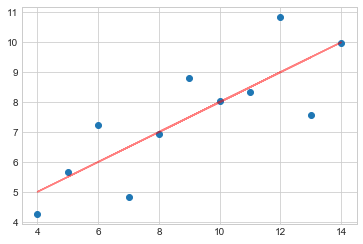

In [17]:
check(x1,y1)

Среднее x = (9.0,), среднее x = 7.50090909090909
Дисперсия x = 11.0, дисперсия x = 4.127629090909091
Коеффициент корреляции Пирсона равен 0.81642051634484
Уравнение линейной регресии y = 3.0000909090909103 + 0.5000909090909091*x


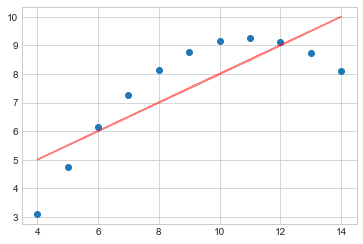

In [18]:
check(x2, y2)

Среднее x = (9.0,), среднее x = 7.5
Дисперсия x = 11.0, дисперсия x = 4.12262
Коеффициент корреляции Пирсона равен 0.81642051634484
Уравнение линейной регресии y = 3.0000909090909103 + 0.5000909090909091*x


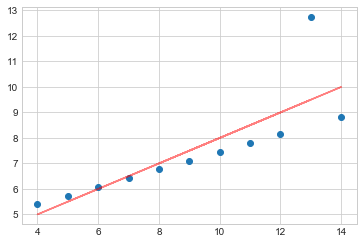

In [19]:
check(x3, y3)

Среднее x = (9.0,), среднее x = 7.500909090909091
Дисперсия x = 11.0, дисперсия x = 4.123249090909091
Коеффициент корреляции Пирсона равен 0.81642051634484
Уравнение линейной регресии y = 3.0000909090909103 + 0.5000909090909091*x


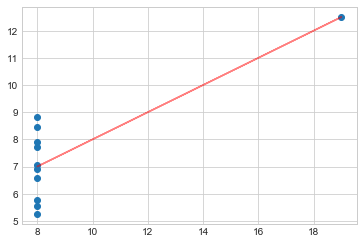

In [20]:
check(x4, y4)